In [1]:
%matplotlib inline

In [2]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [3]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [4]:
output_dir = "."

In [5]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/TemporalProblem.pkl")

In [6]:
order_celltypes = ['Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [7]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffbb78', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#ffbb78', 'Fev+ Delta,1':'#98df8a',
        'Fev+ Delta,2': '#17becf', 'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [8]:
tp0.adata.uns["refinement_colors"] = [color_dict[ct] for ct in tp0.adata.obs["refinement"].cat.categories]

In [9]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=True)

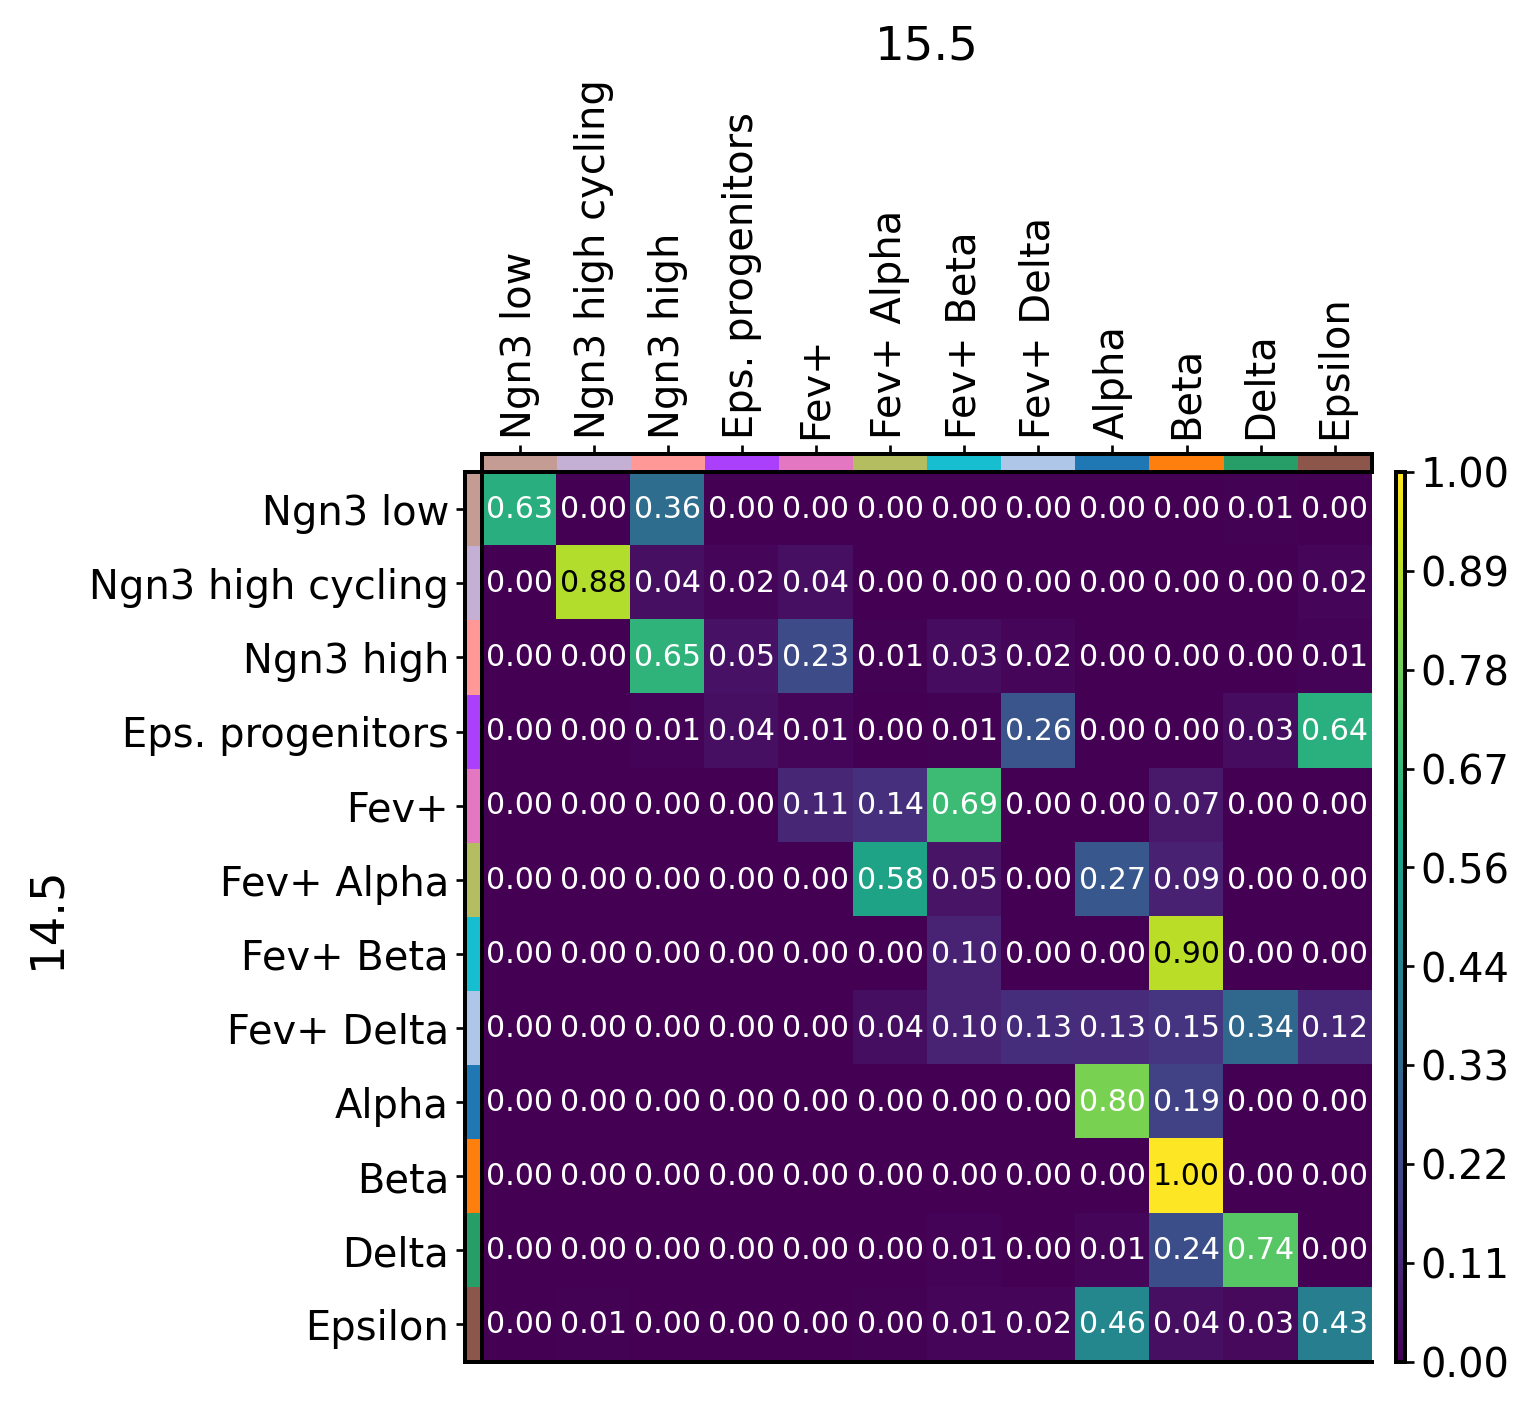

In [10]:
mpl.cell_transition(tp0, dpi=120, fontsize=9, save=os.path.join(output_dir, "cell_transition_endocrine_forward.png"))

In [11]:
_ = tp0.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=False)

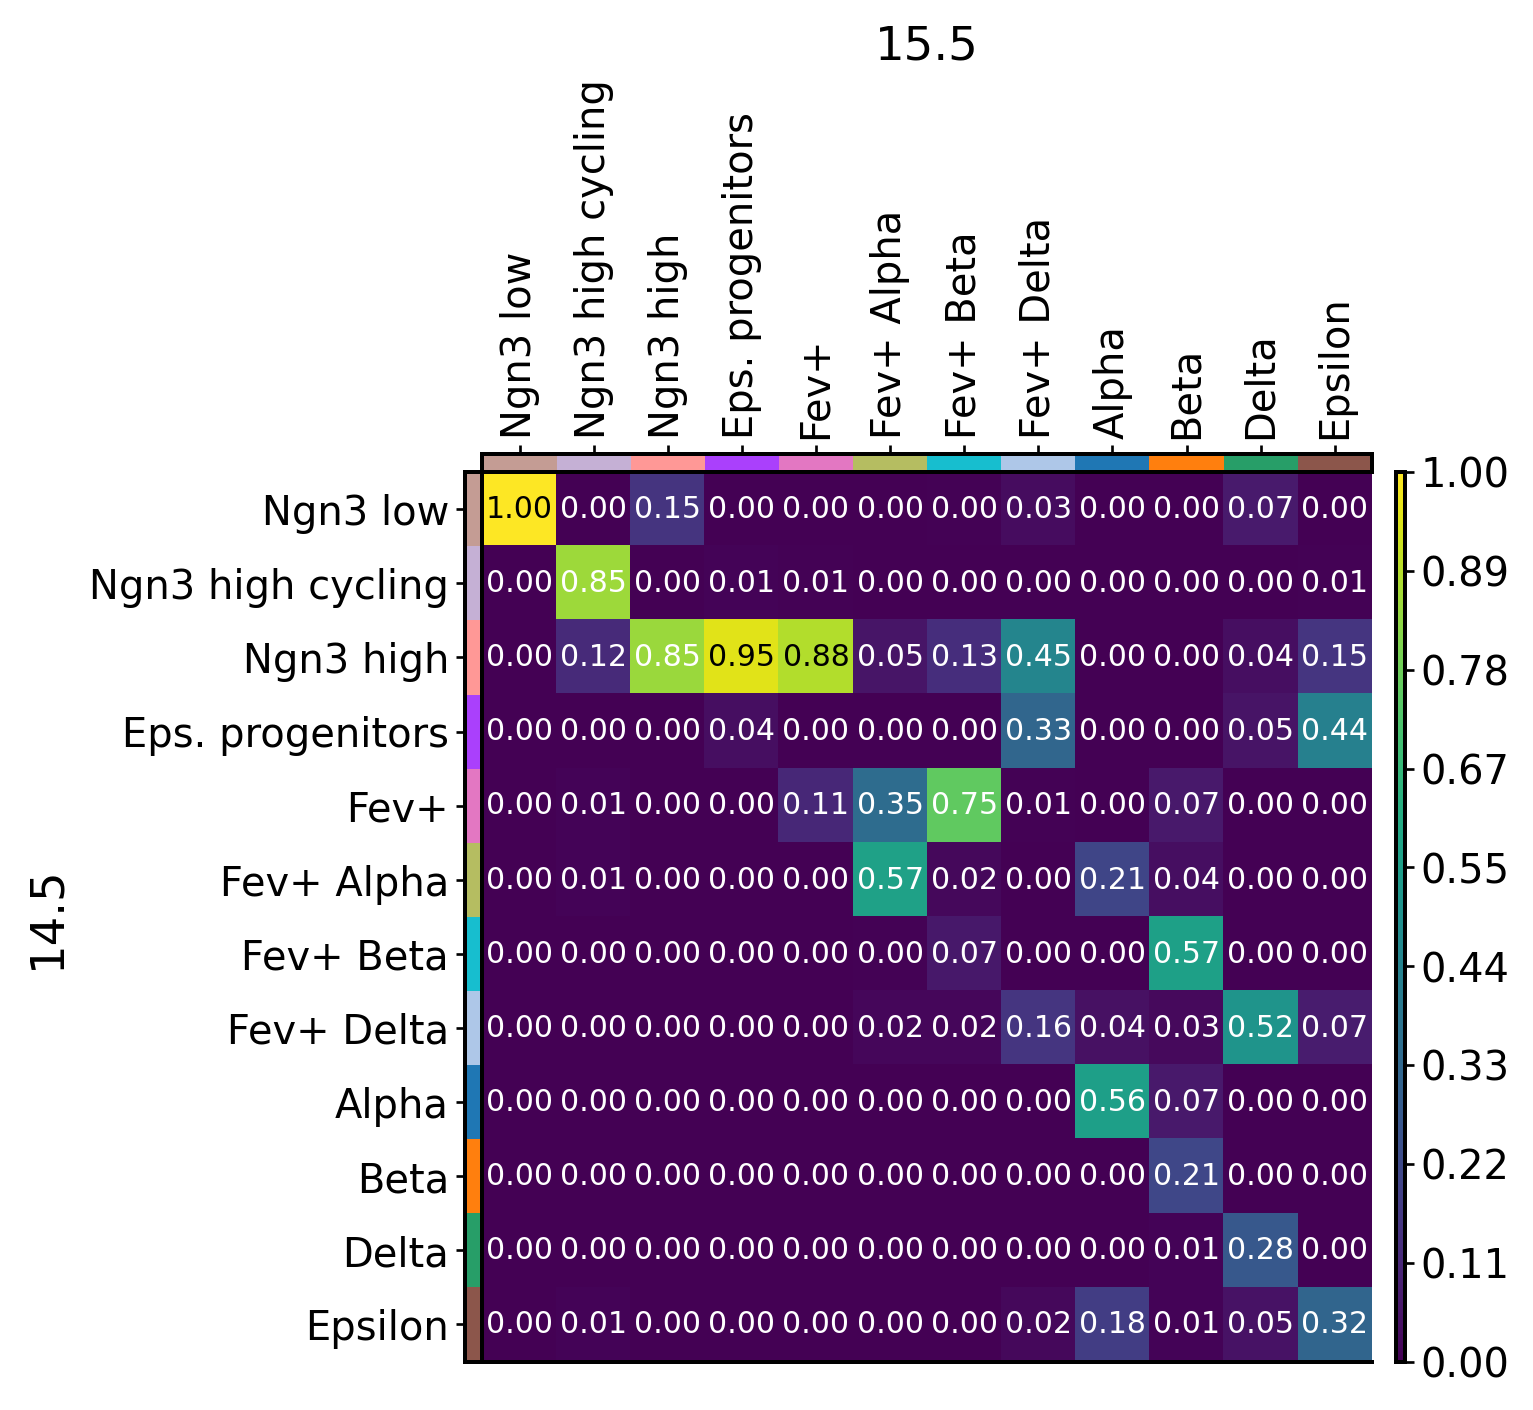

In [12]:
mpl.cell_transition(tp0, dpi=120, fontsize=9, save=os.path.join(output_dir, "cell_transition_endocrine_backward.png"))

In [13]:
cluster_subset = ["Ngn3 high,1", "Eps. progenitors", "Fev+ Delta,0", "Fev+ Delta,1", "Fev+ Delta,2", "Epsilon", "Delta", "Alpha", "Beta"]

In [14]:
_ = tp0.cell_transition(14.5, 15.5, {"refinement": cluster_subset}, {"refinement": cluster_subset}, forward=True)

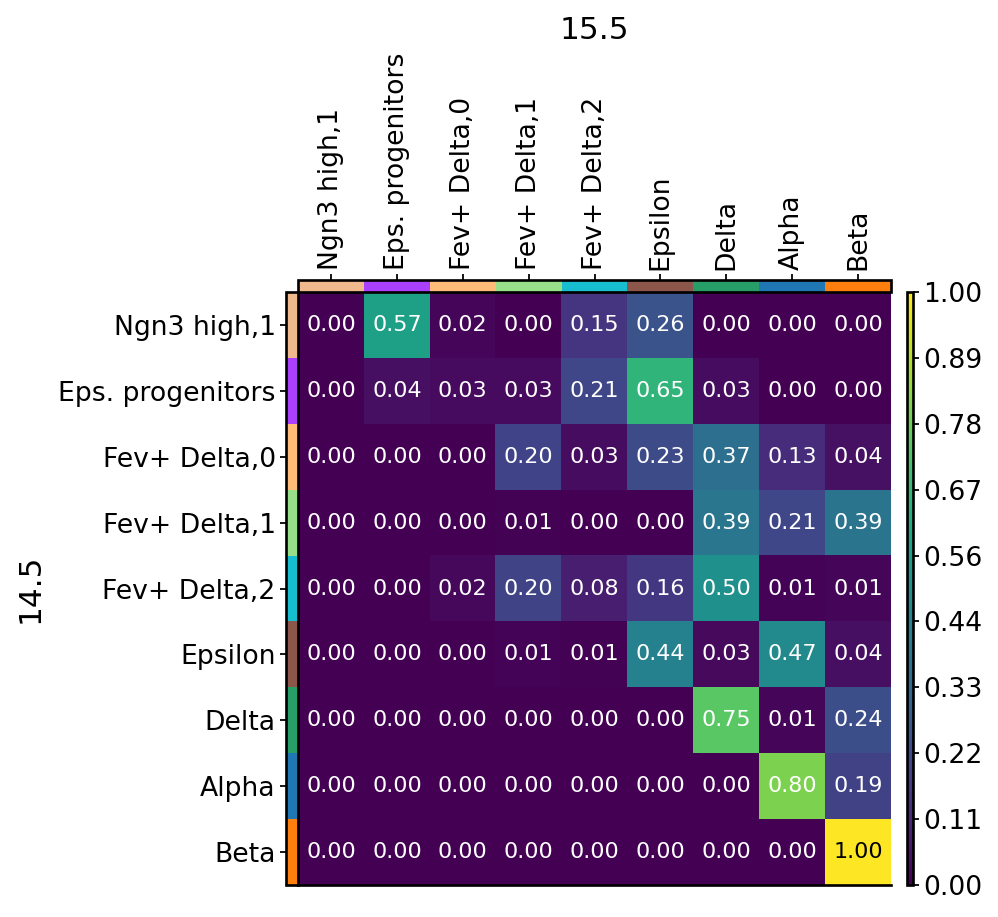

In [15]:
fig = mpl.cell_transition(tp0, dpi=80, fontsize=10, save="cell_transition_reduced_forward_annotation.png")

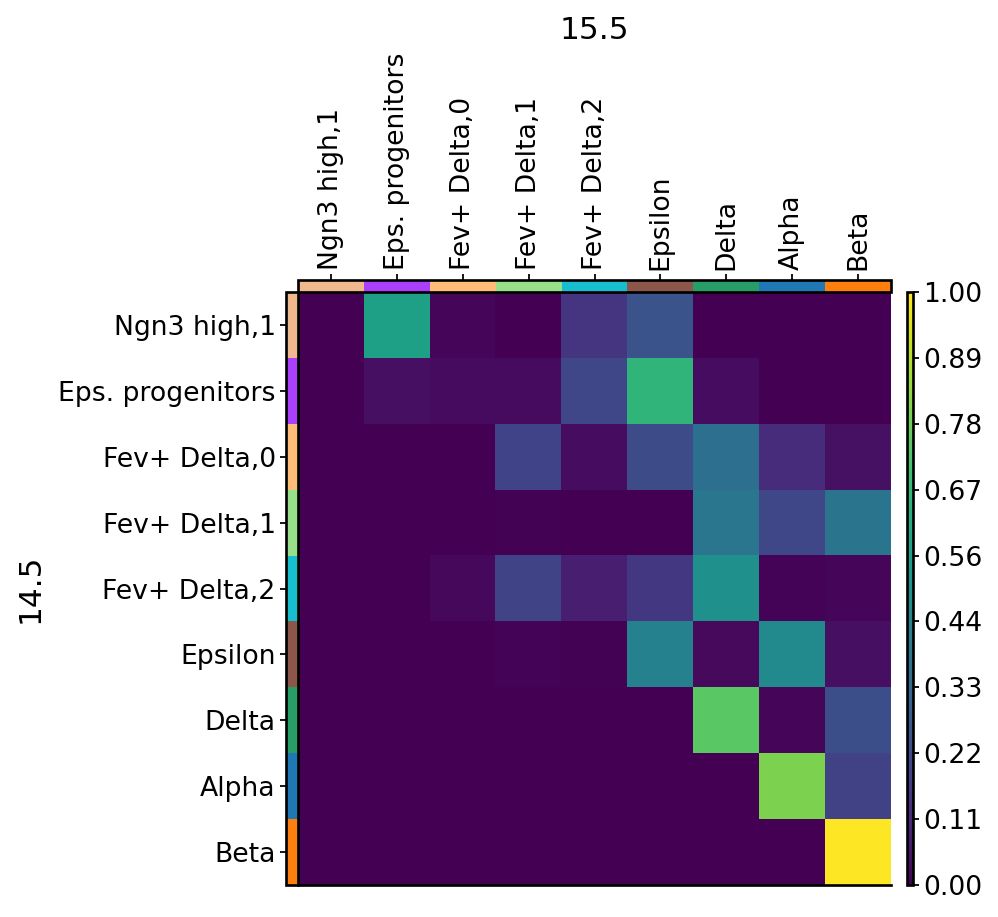

In [16]:
fig = mpl.cell_transition(tp0, dpi=80, annotate=None, save="cell_transition_reduced_forward.png")

In [17]:
_ = tp0.cell_transition(14.5, 15.5, {"refinement": cluster_subset}, {"refinement": cluster_subset}, forward=False)

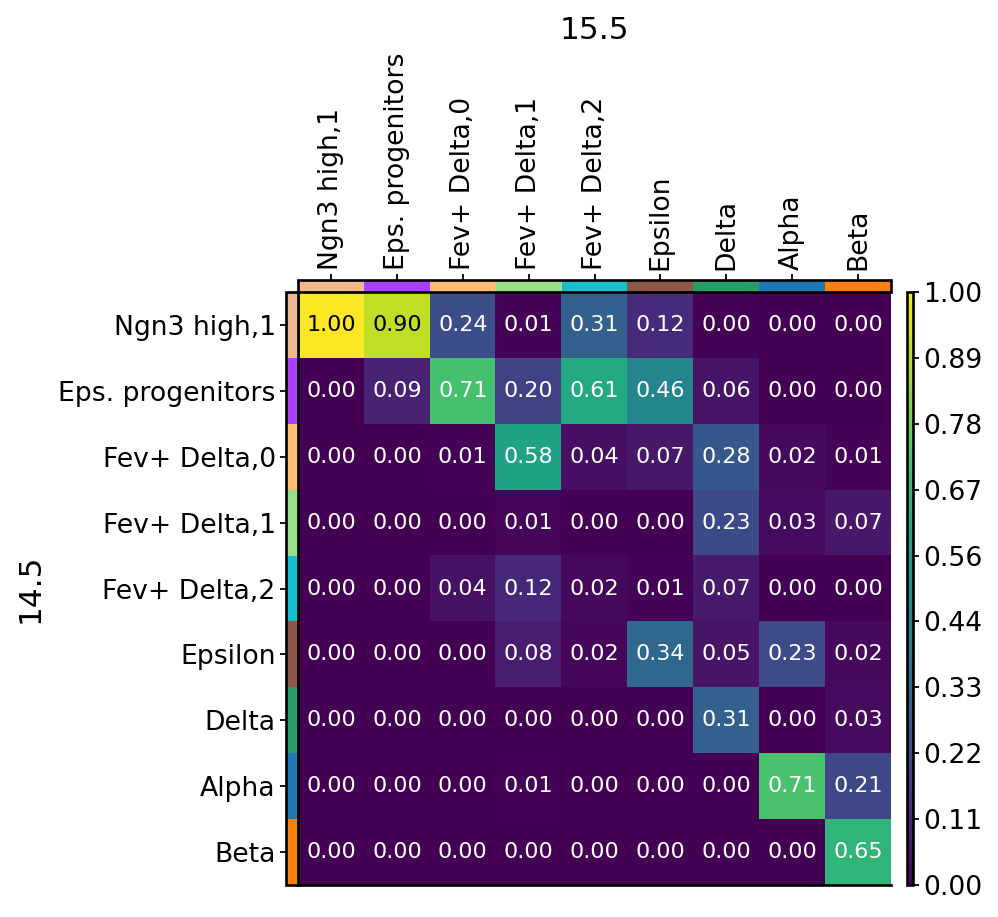

In [18]:
fig = mpl.cell_transition(tp0, dpi=80, fontsize=10, save="cell_transition_reduced_backward_annotation.png")

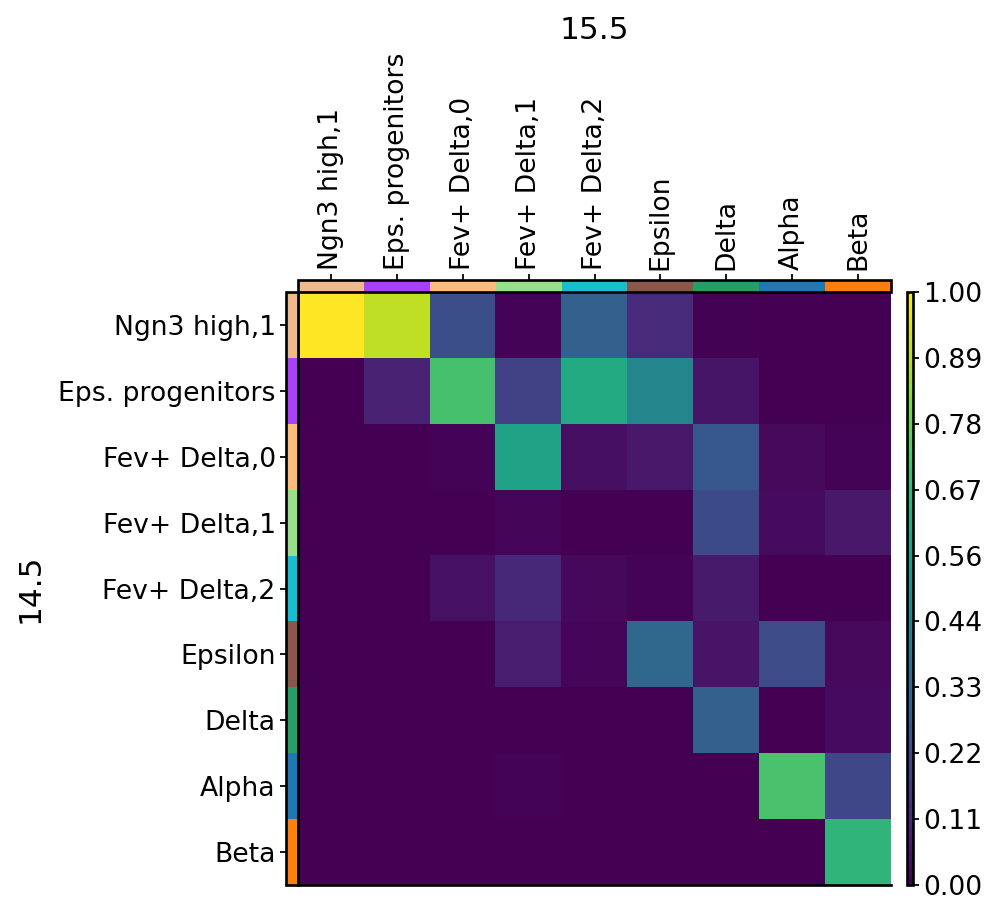

In [19]:
fig = mpl.cell_transition(tp0, dpi=80, annotate=None, save="cell_transition_reduced_backward.png")

# Epsilon progenitors

In [20]:
tp0.push(14.5, 15.5, data="celltype", subset="Eps. progenitors")

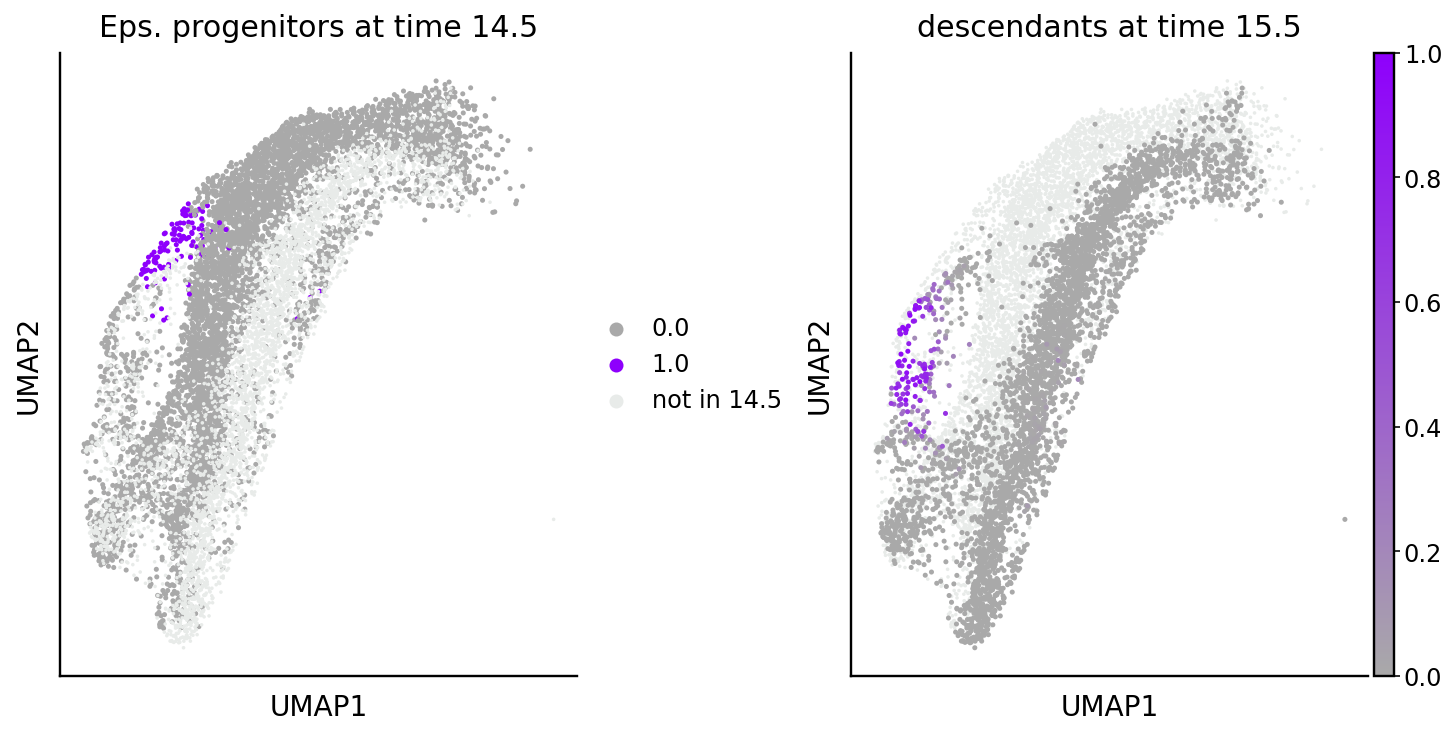

In [21]:
fig = mpl.push(tp0, time_points=[14.5, 15.5], figsize=(10,5), scale=True, basis="umap", save=os.path.join(output_dir, "desc_eps_prog.png"))


In [22]:
tp0.pull(14.5, 15.5, data="celltype", subset="Eps. progenitors")

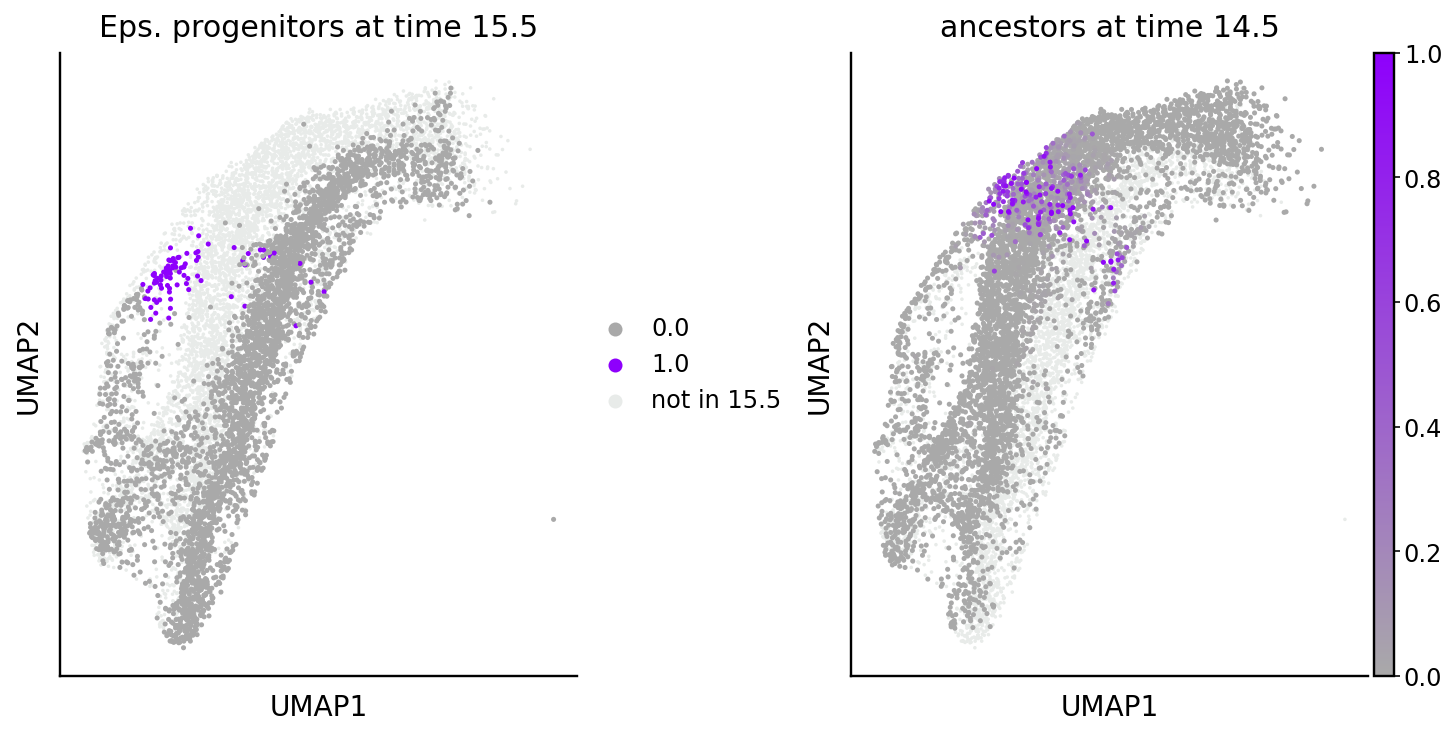

In [23]:
mpl.pull(tp0, time_points=[14.5, 15.5], basis="umap", figsize=(10,5), save=os.path.join(output_dir, "anc_eps_prog.png"))

# Ngn3 high, 1

In [24]:
tp0.push(14.5, 15.5, data="refinement", subset="Ngn3 high,1")

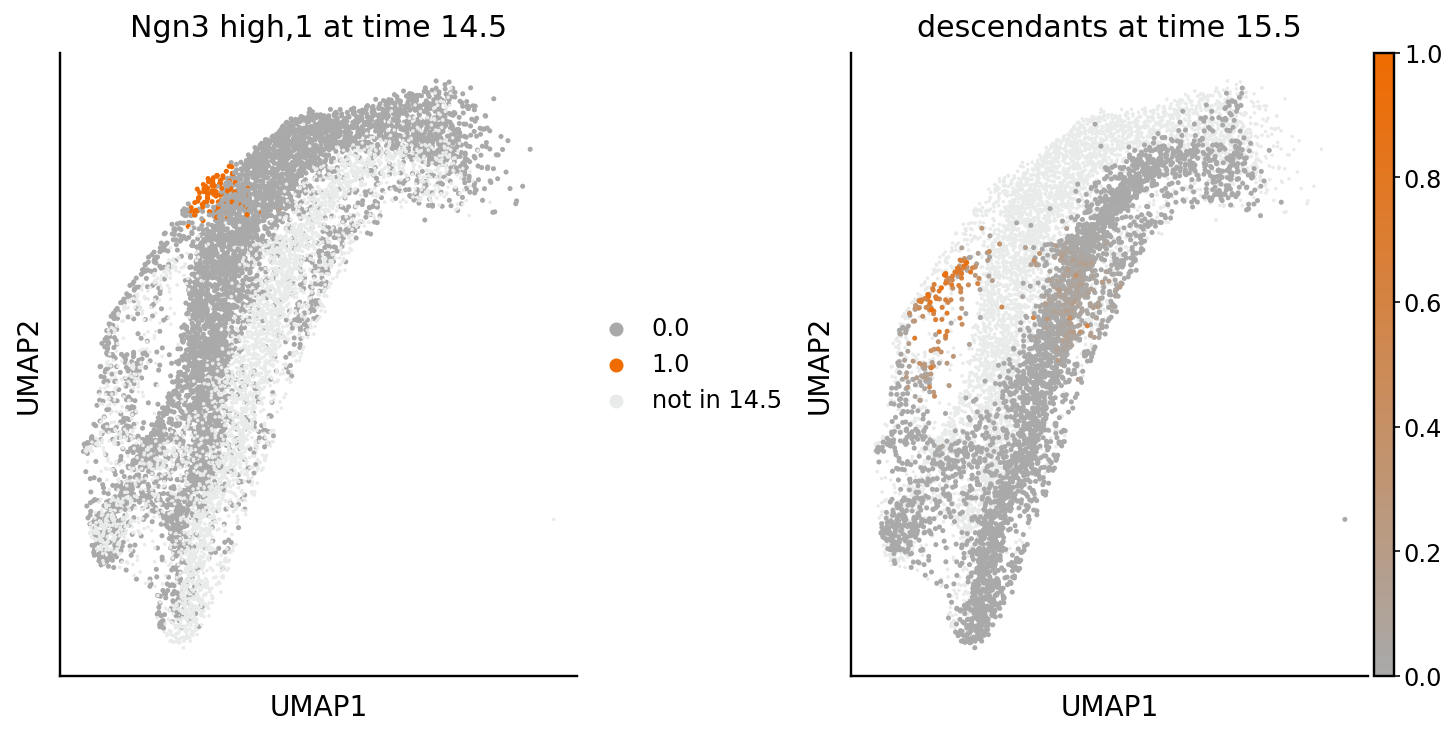

In [25]:
mpl.push(tp0, time_points=[14.5, 15.5], figsize=(10,5), basis="umap", title="Ngn3 high,1 cells at E14.5", save="desc_ngn3_high.png")

In [26]:
tp0.pull(14.5, 15.5, data="refinement", subset="Ngn3 high,1")

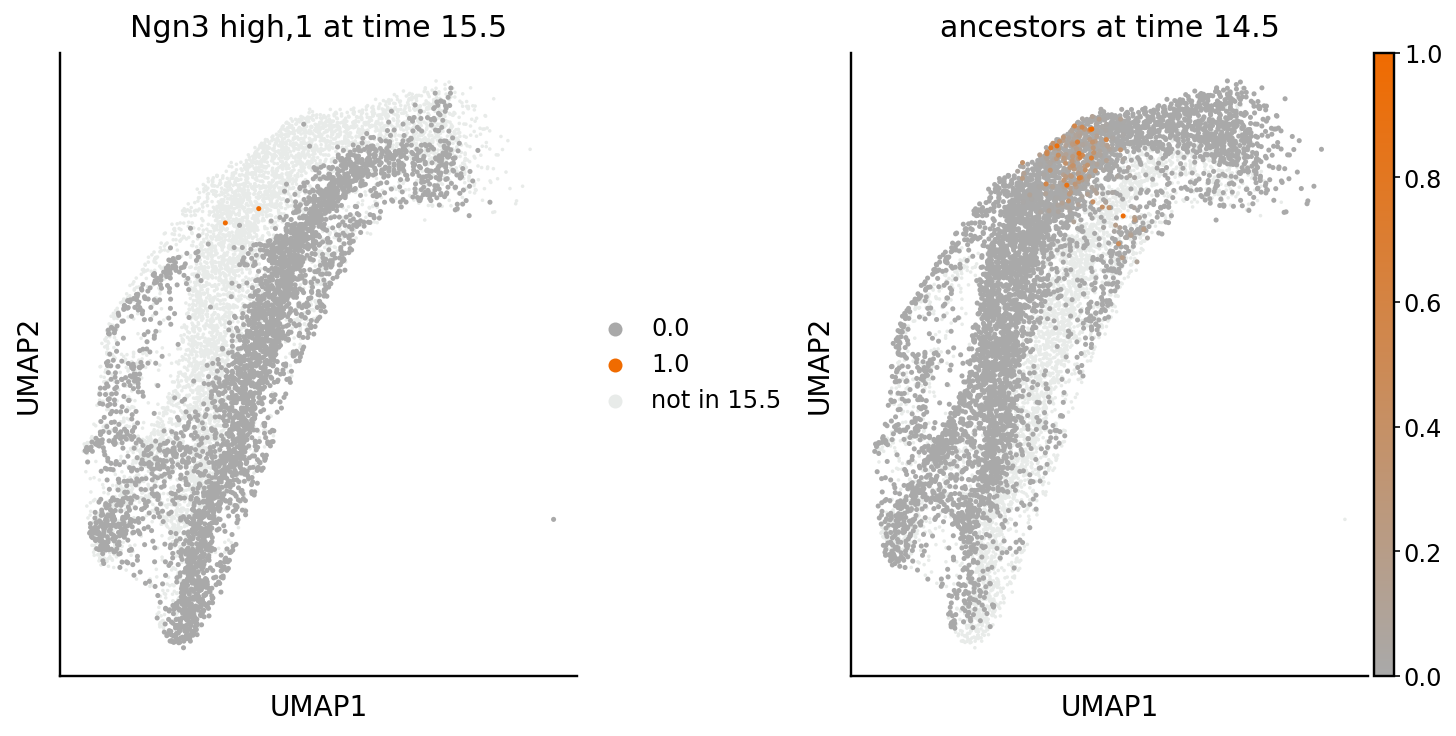

In [27]:
mpl.pull(tp0, time_points=[14.5, 15.5], figsize=(10,5), basis="umap", title="Ngn3 high,1 cells at E14.5", save="anc_ngn3_high.png")

In [28]:
cluster_subset = ["Ngn3 high,1", "Eps. progenitors", "Fev+ Delta,0", "Fev+ Delta,1", "Fev+ Delta,2", "Epsilon", "Delta", "Alpha", "Beta"]

# Epsilon

In [29]:
tp0.pull(14.5, 15.5, data="refinement", subset="Epsilon")

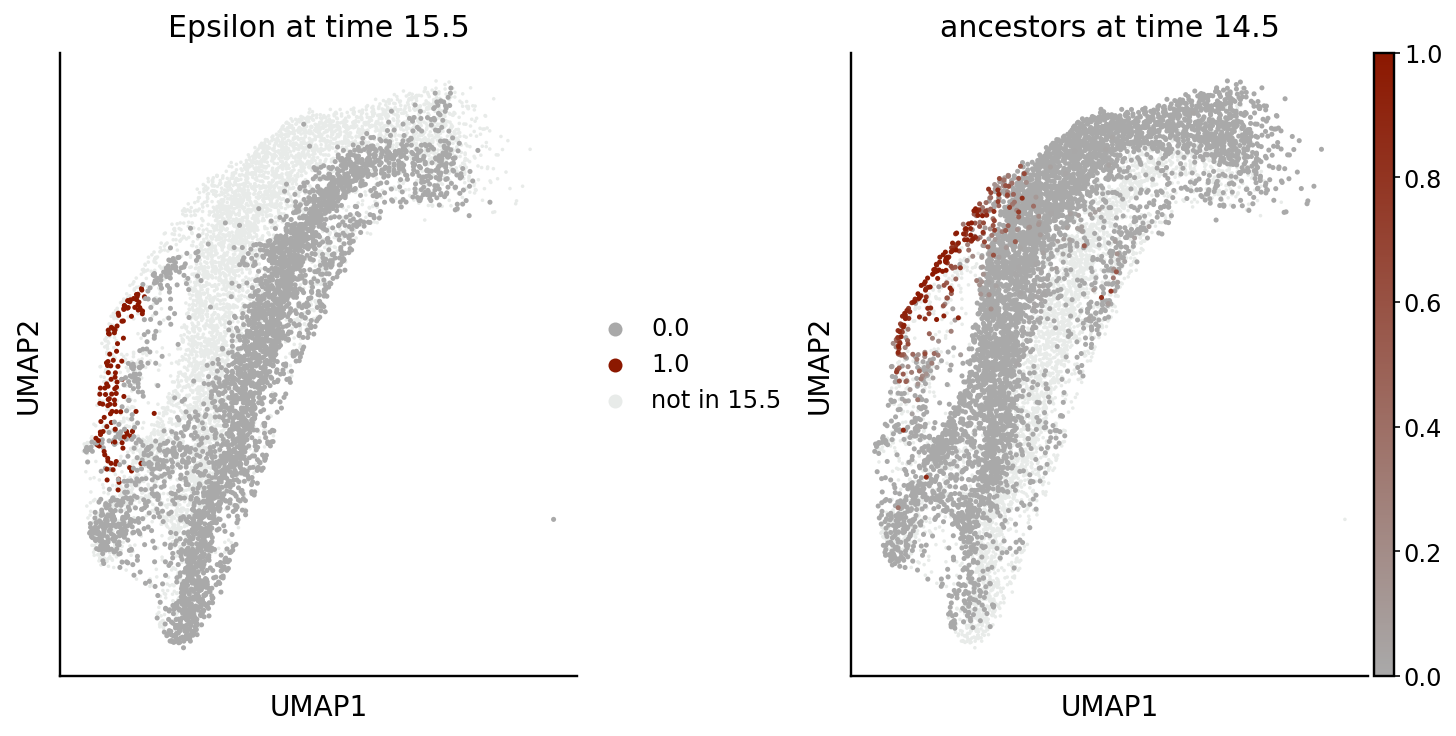

In [30]:
fig = mpl.pull(tp0, time_points=[14.5, 15.5], figsize=(10,5),  basis="umap", save="Epsilon_anc.png")

In [31]:
tp0.push(14.5, 15.5, data="refinement", subset="Epsilon")

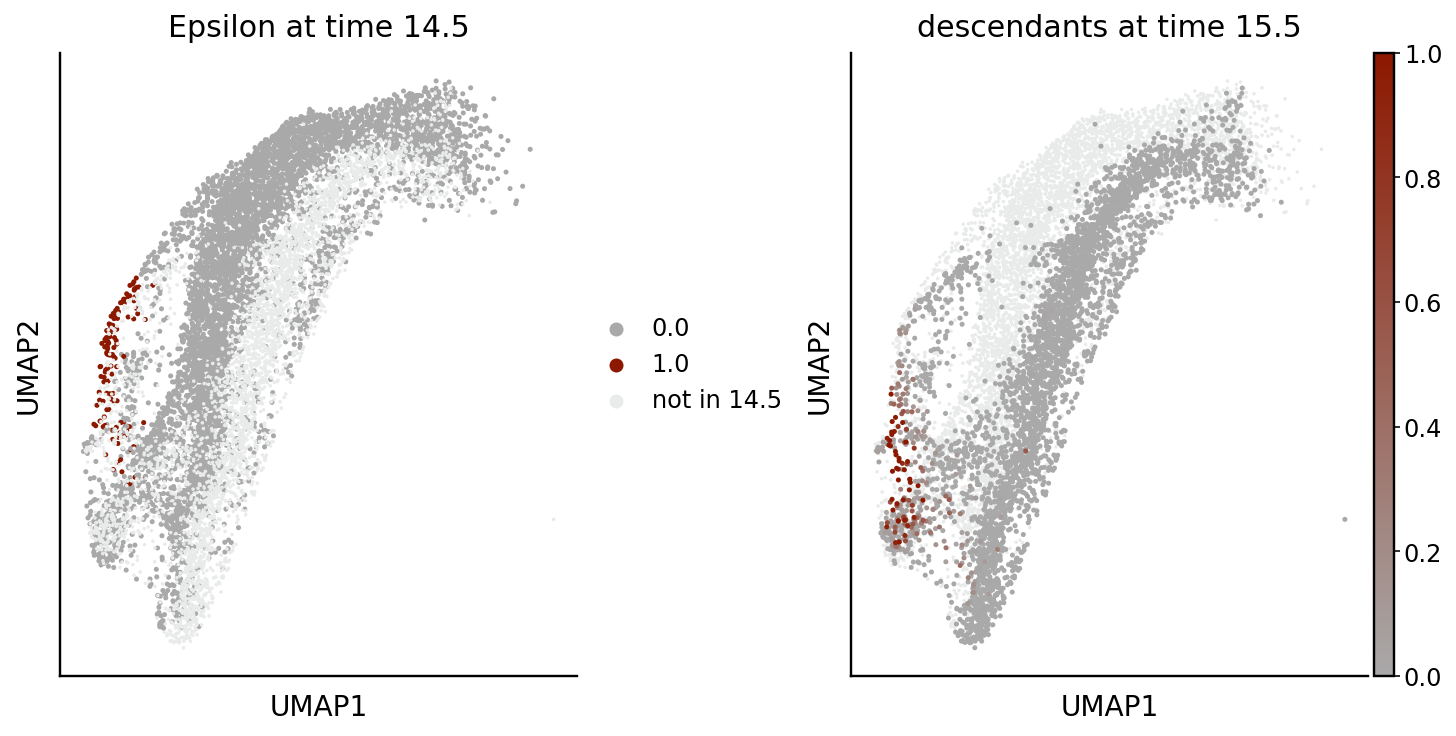

In [32]:
fig = mpl.push(tp0, time_points=[14.5, 15.5], figsize=(10,5), basis="umap", save="Epsilon_desc_0.png")

# Delta

In [33]:
tp0.pull(14.5, 15.5, data="celltype", subset="Delta")

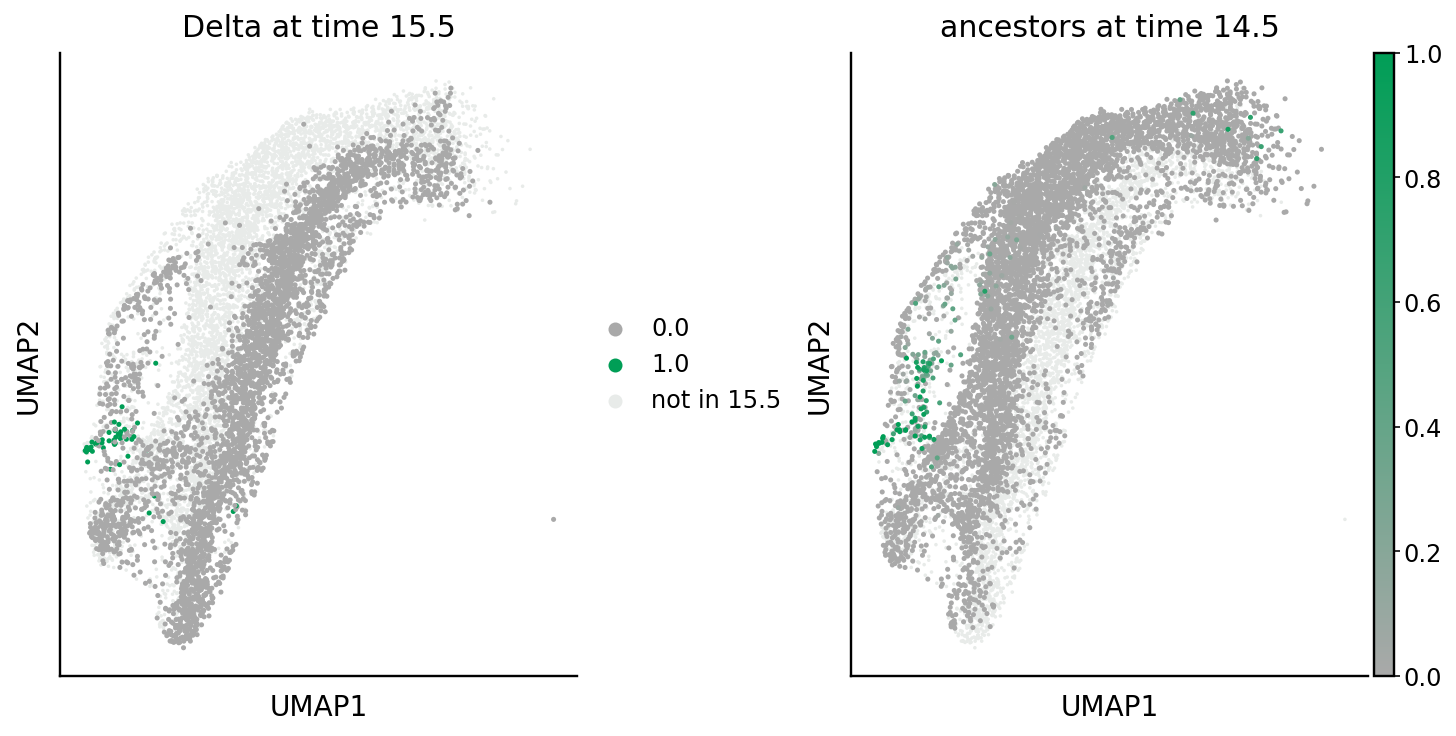

In [34]:
mpl.pull(tp0, time_points=[14.5, 15.5], figsize=(10,5), basis="umap", save="delta_anc.png")

In [35]:
tp0.push(14.5, 15.5, data="celltype", subset="Delta")

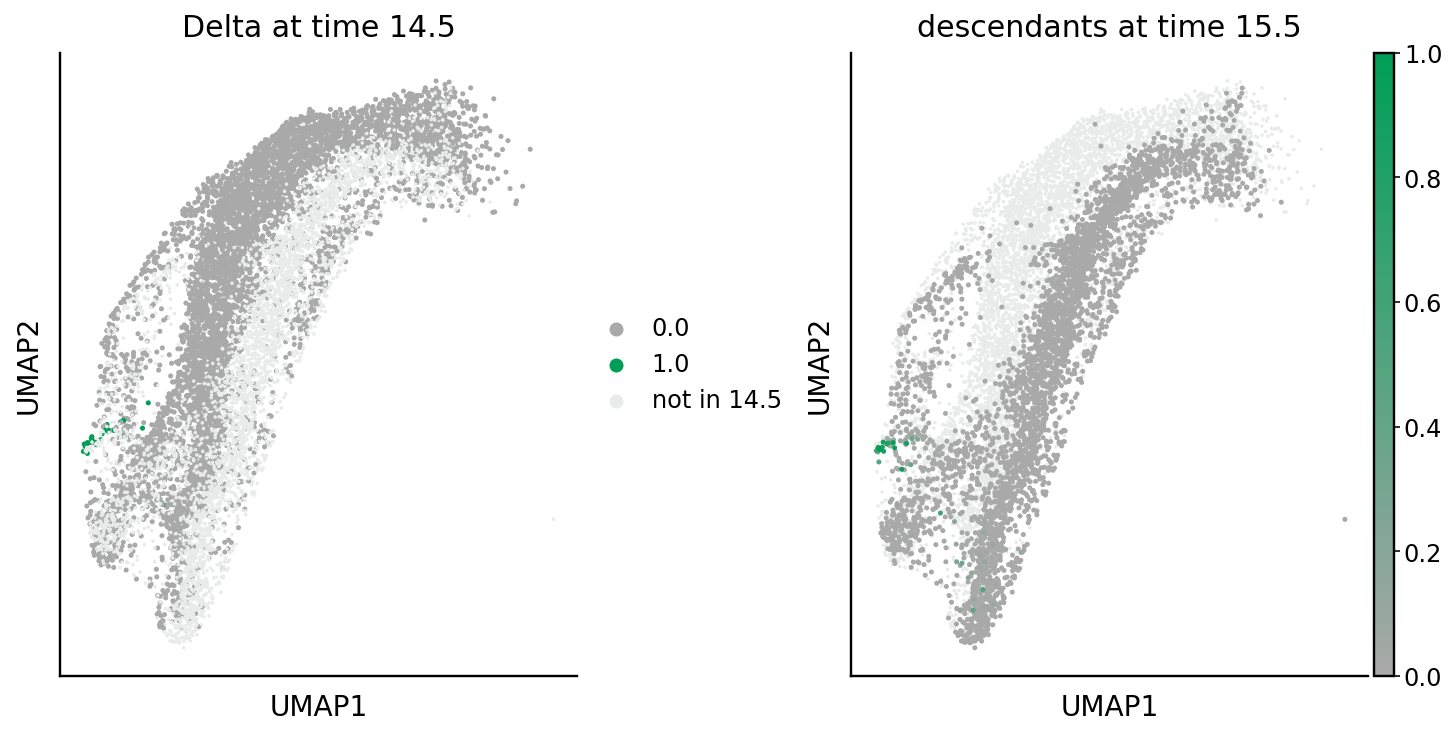

In [36]:
mpl.push(tp0, time_points=[14.5, 15.5], figsize=(10,5), basis="umap", save="delta_desc.png")

# Fev+ Delta,0

In [37]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,0")

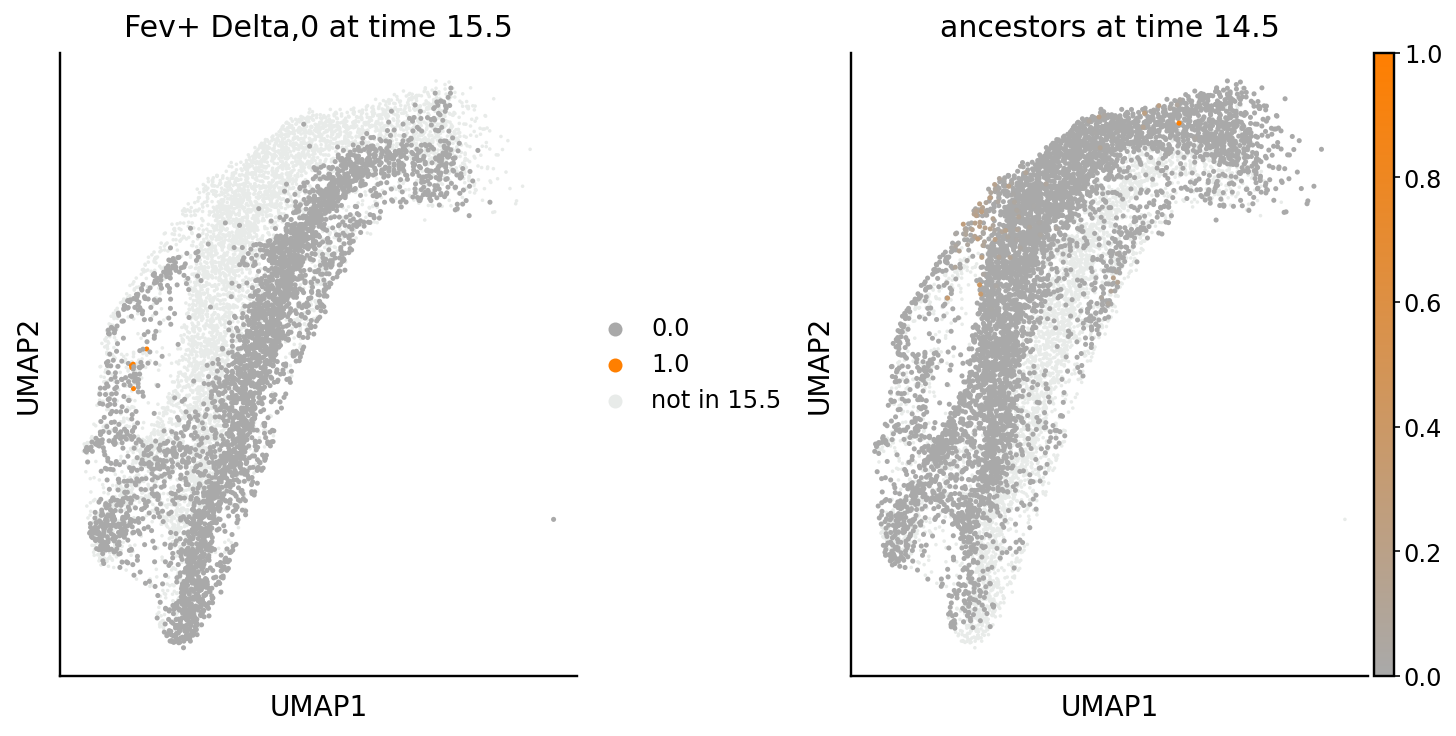

In [38]:
mpl.pull(tp0, time_points=[14.5, 15.5], figsize=(10,5), basis="umap", save="fev_delta0_anc.png")

In [39]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,0")

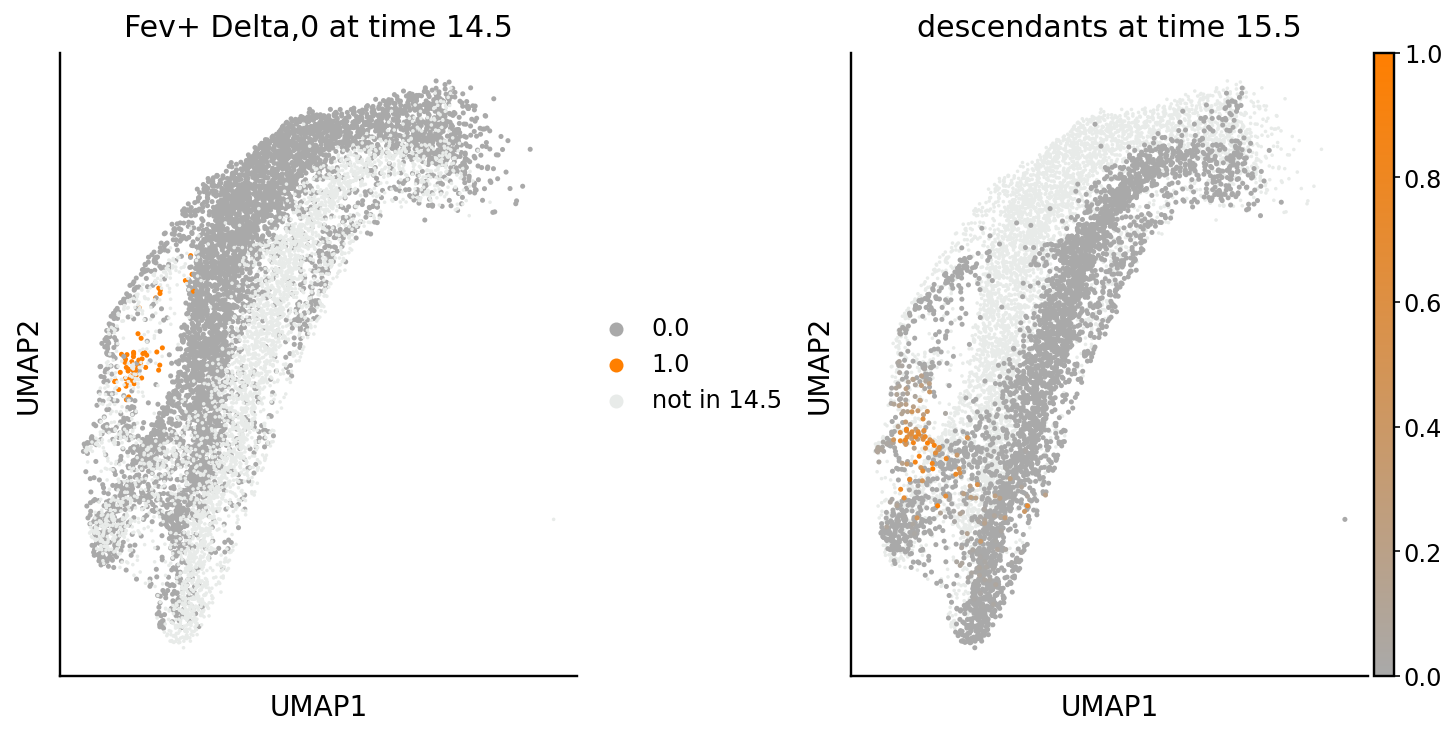

In [40]:
fig = mpl.push(tp0, time_points=[14.5, 15.5], basis="umap", figsize=(10,5), save="fev_delta0_desc.png")

# Fev+ Delta,1

In [41]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,1")

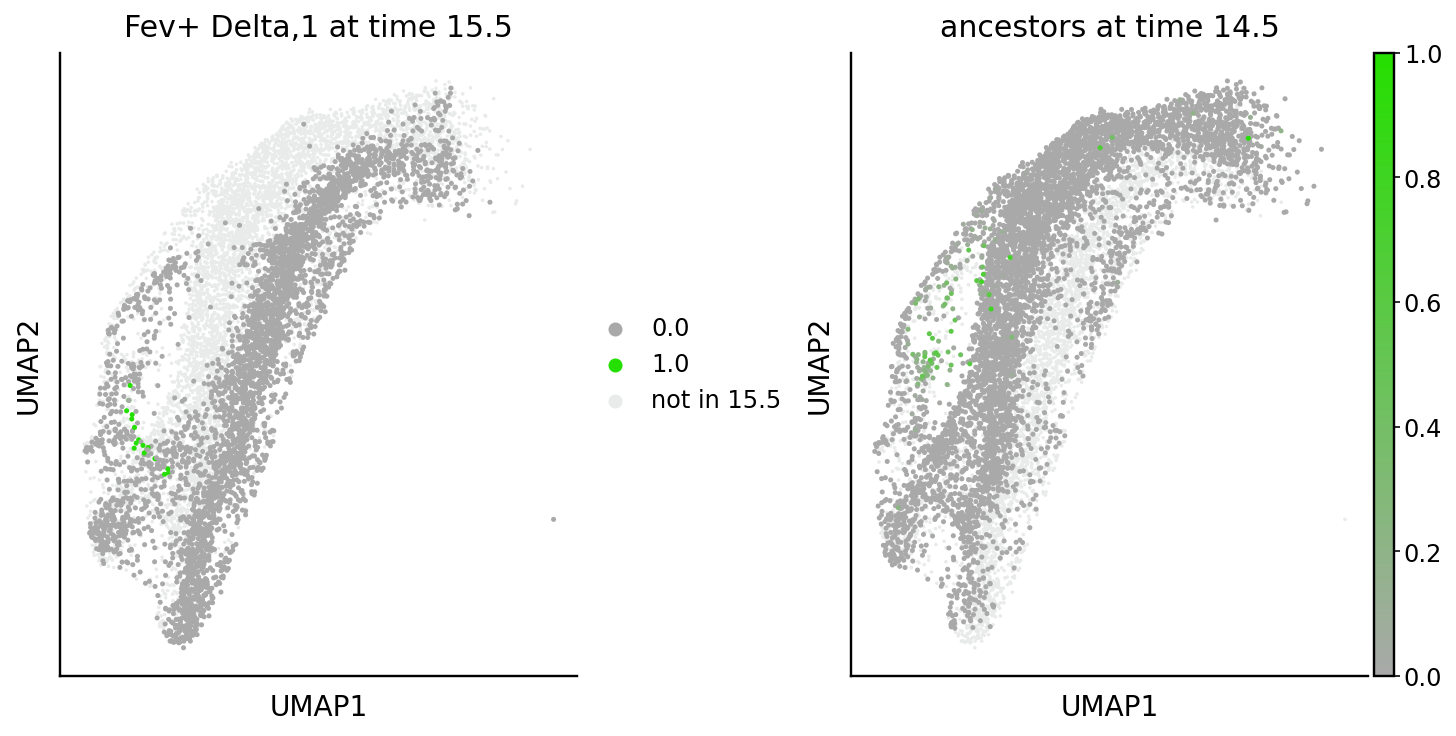

In [42]:
mpl.pull(tp0, time_points=[14.5, 15.5], basis="umap", figsize=(10,5), save="fev_delta1_anc.png")

In [43]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,1")

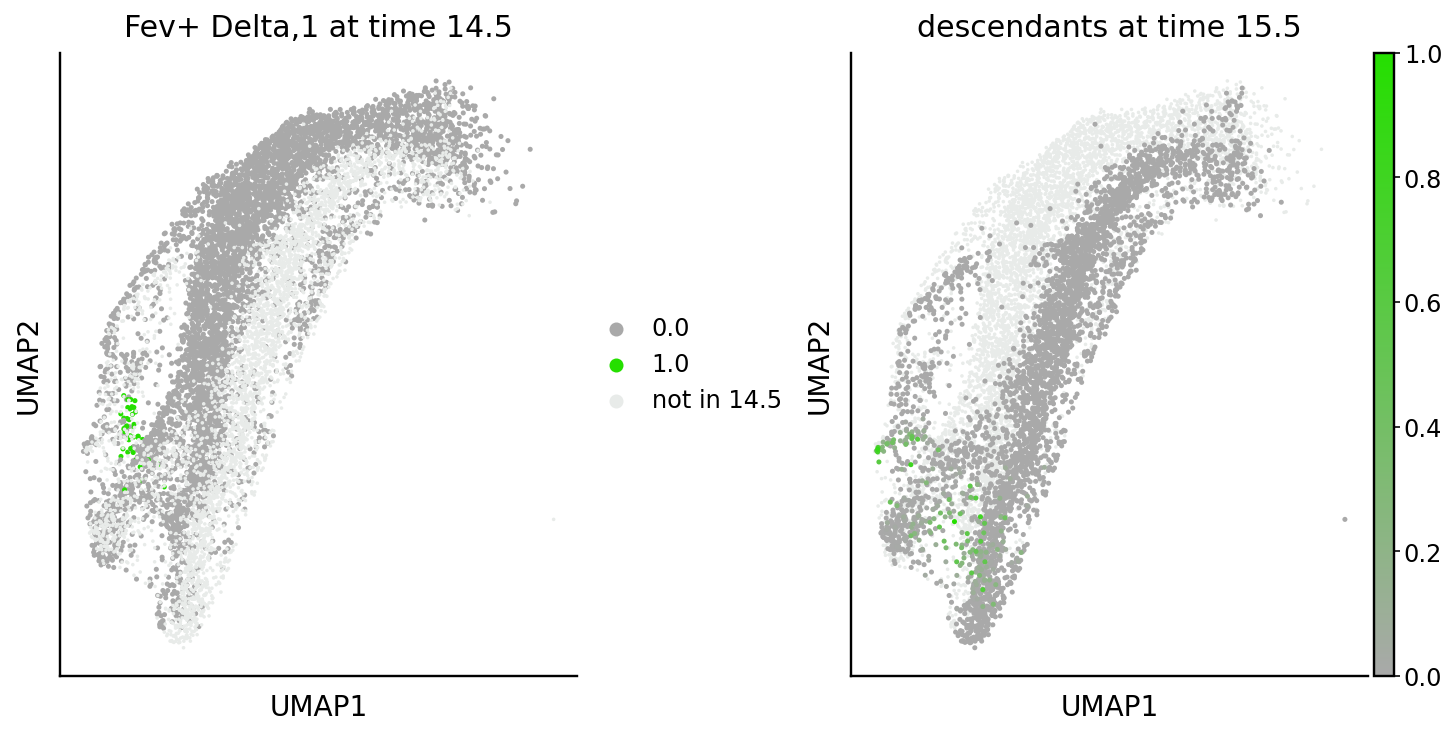

In [44]:
mpl.push(tp0, time_points=[14.5, 15.5], basis="umap", figsize=(10,5), save="fev_delta1_desc.png")

# Fev+ Delta,2

In [45]:
tp0.pull(14.5, 15.5, data="refinement", subset="Fev+ Delta,2")

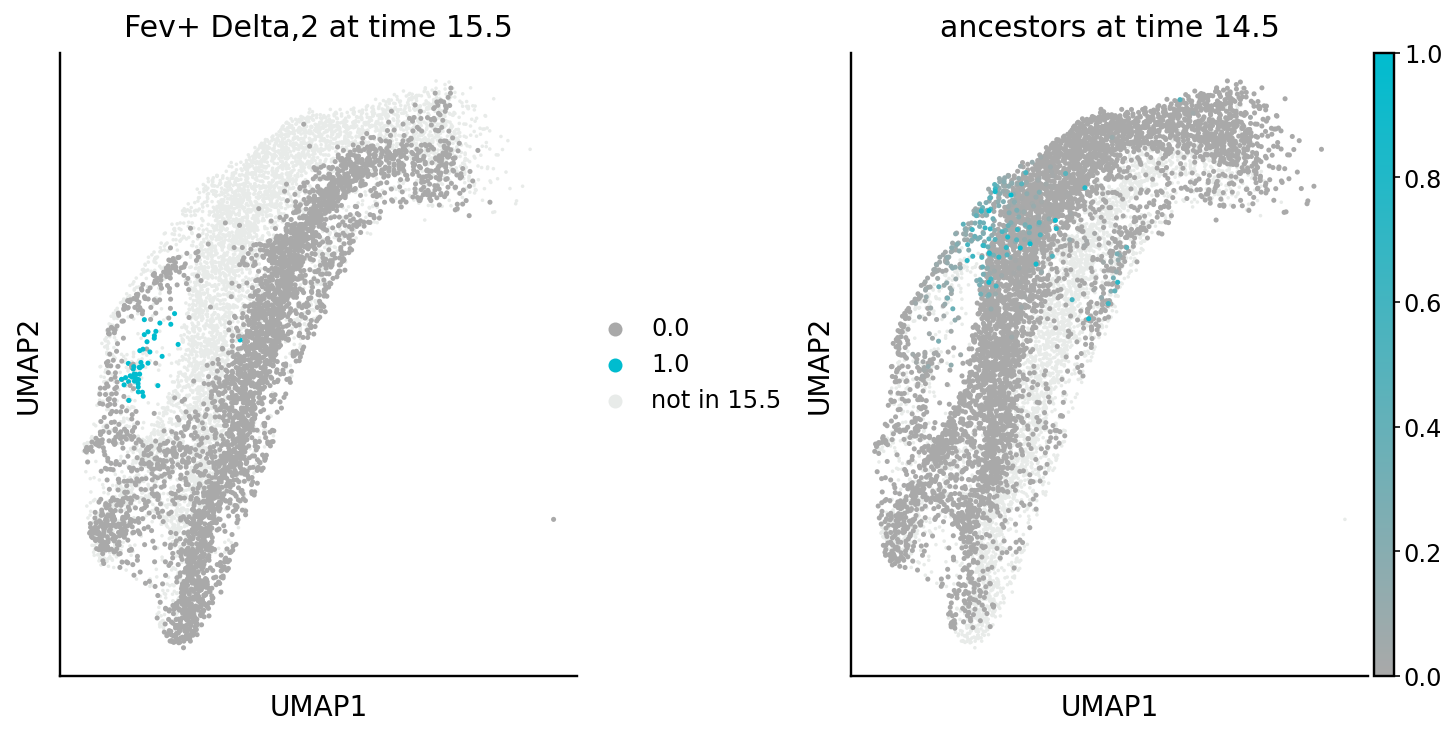

In [46]:
mpl.pull(tp0, time_points=[14.5, 15.5], basis="umap", figsize=(10,5), save="fev_delta2_anc.png")

In [47]:
tp0.push(14.5, 15.5, data="refinement", subset="Fev+ Delta,2")

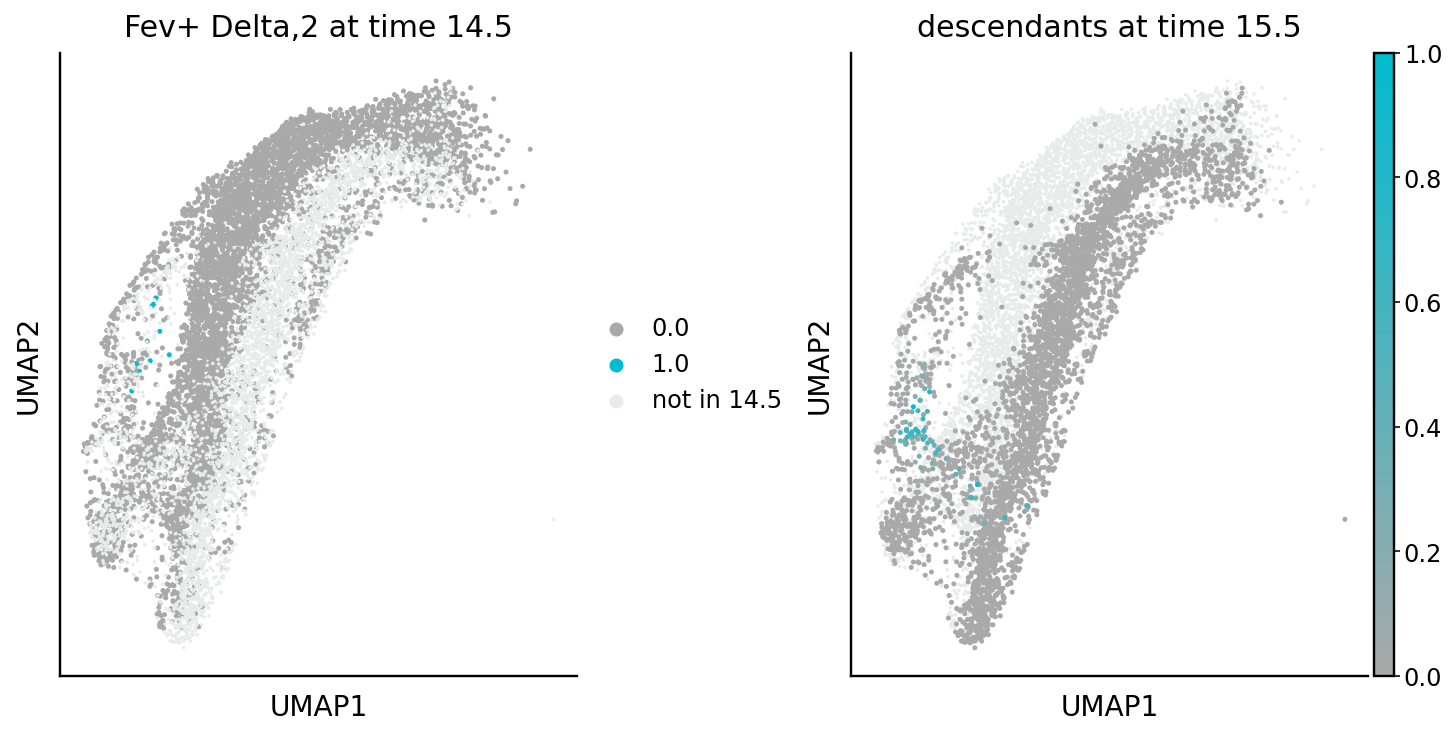

In [48]:
fig = mpl.push(tp0, time_points=[14.5, 15.5], basis="umap", figsize=(10,5), save="fev_delta2_desc.png")

In [49]:
_ = tp0.cell_transition(14.5, 15.5, "refinement", "refinement", forward=False)

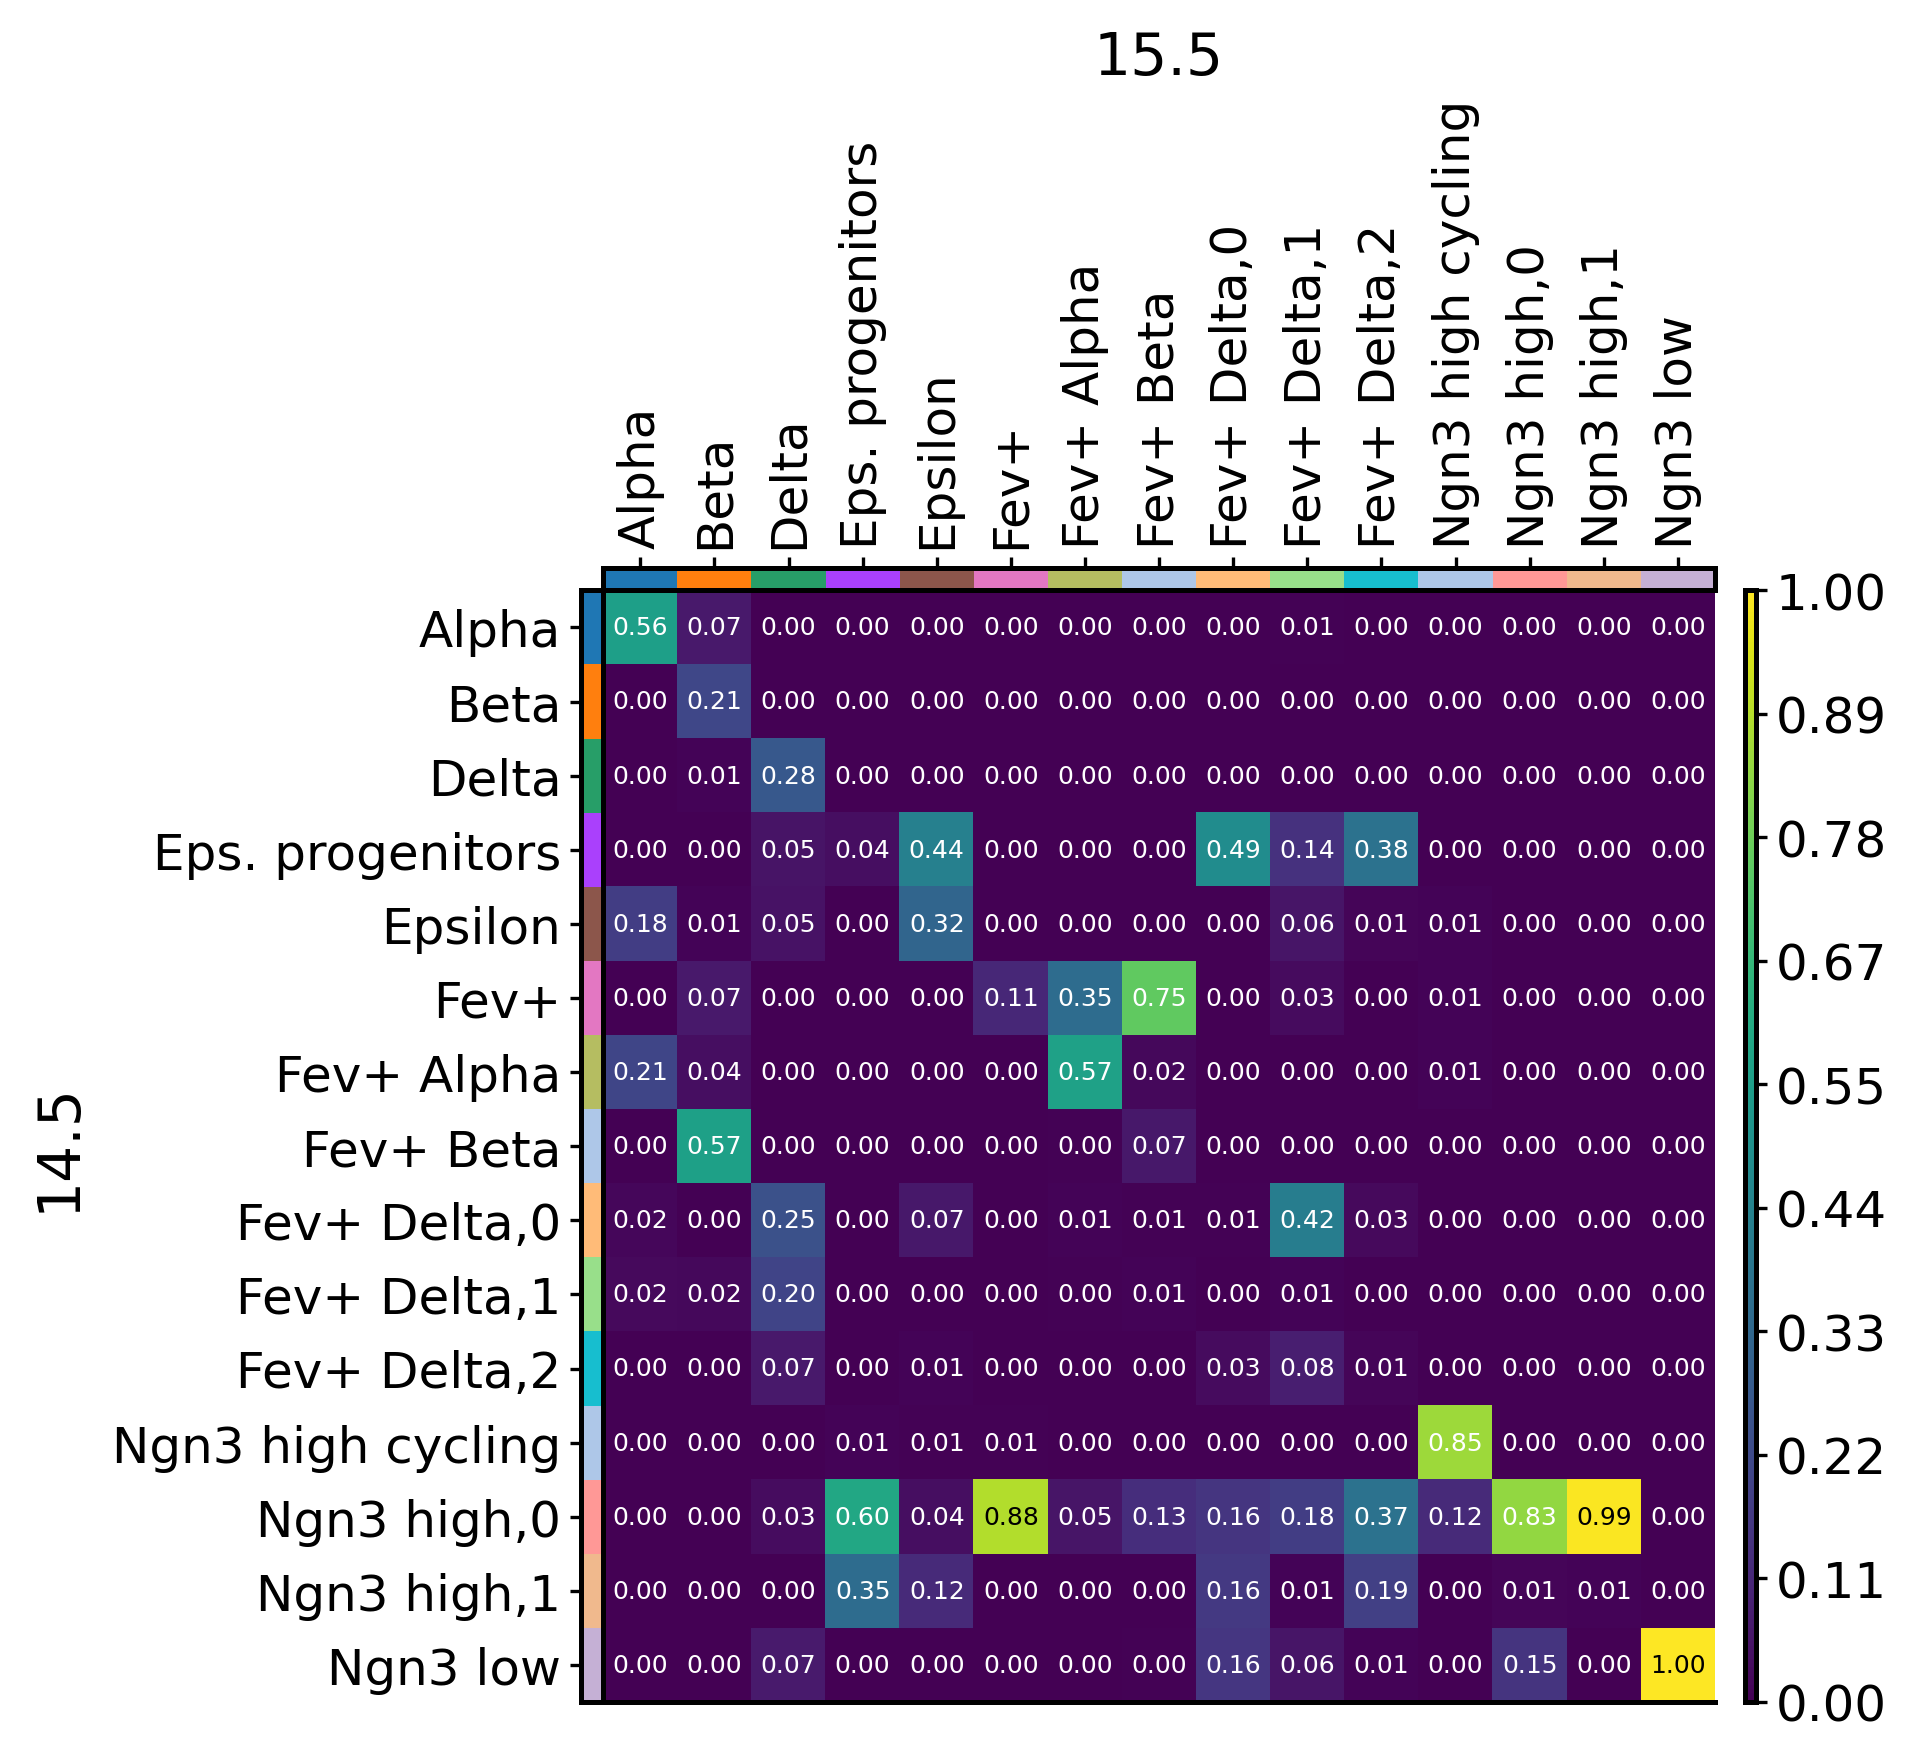

In [50]:
mpl.cell_transition(tp0, dpi=150, fontsize=6, save="cell_transition_refinement_full_backward.png")

In [51]:
_ = tp0.cell_transition(14.5, 15.5, "refinement", "refinement", forward=True)

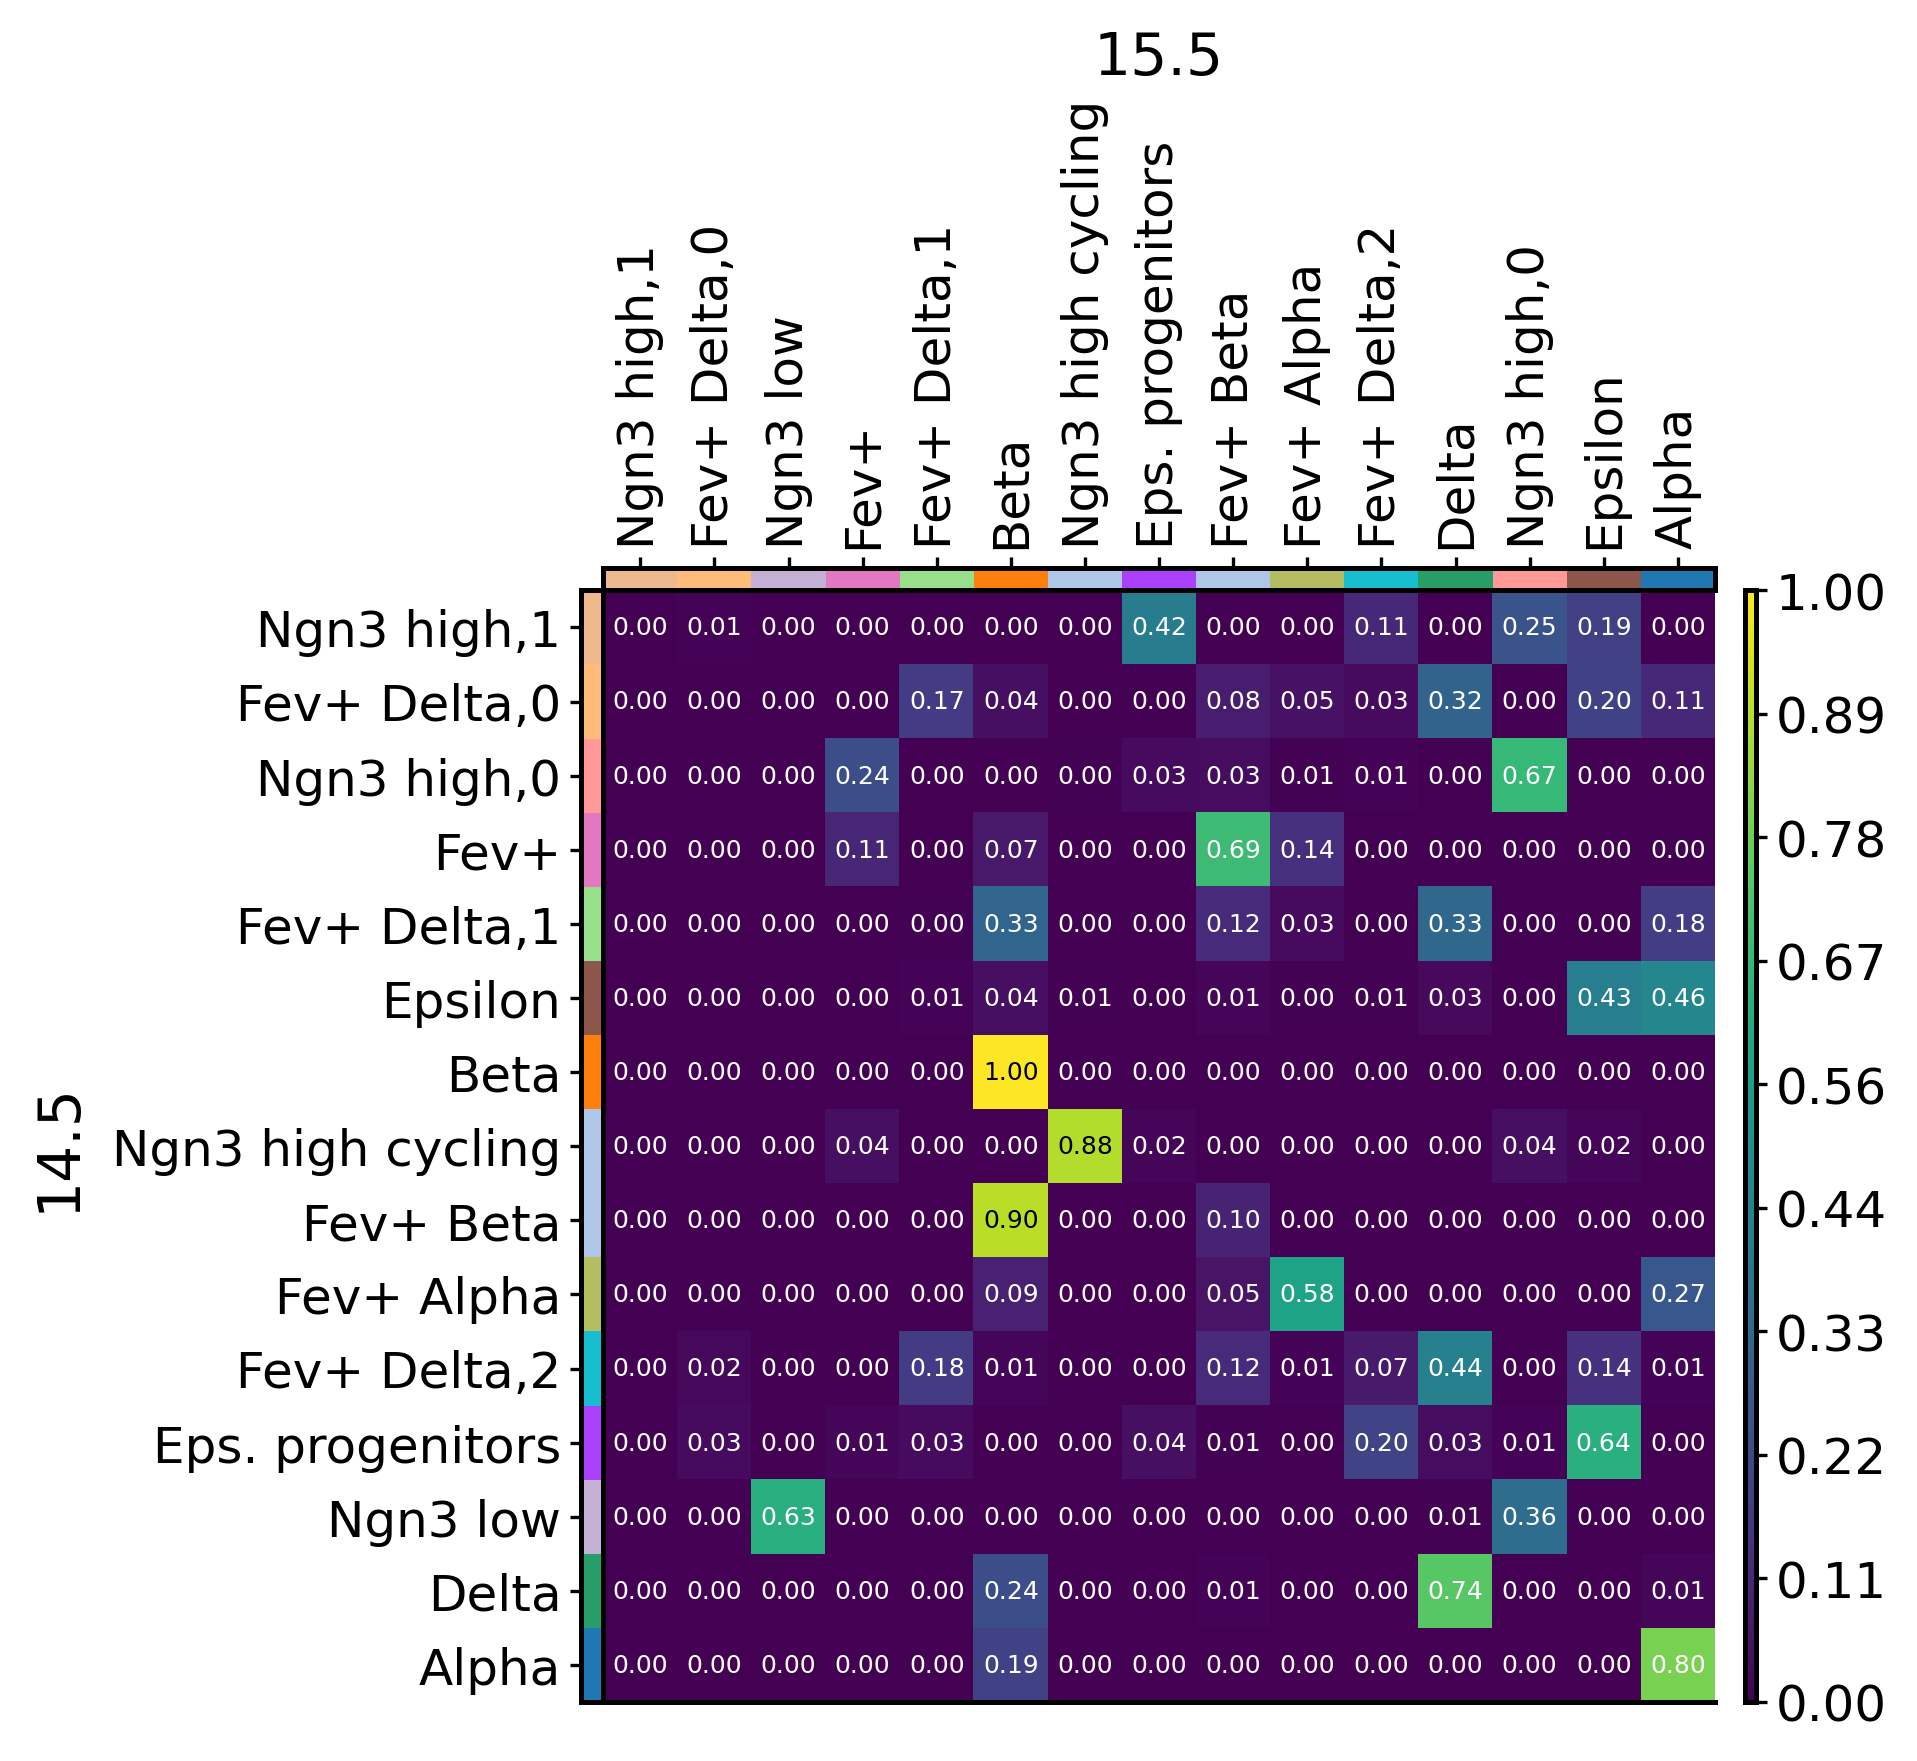

In [52]:
mpl.cell_transition(tp0, dpi=150, fontsize=6, save="cell_transition_refinement_full_forward.png")